In [108]:
from astropy.io import ascii
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df = pd.read_table('finaltablewithheaderBolometric_18_July_2020_MARIA (1).txt',sep='\t',usecols=[0, 5,8])
df = df.reset_index()
df = df.drop(columns = {'Alpha_best Alpha_min Alpha_max'})
df = df.rename(columns={'level_0':'GRB Name', 'level_1':'Z', 'level_2':'logTa_best', 
                        'GRBID':'log Fa', 'logFa_max Photonindex_plateau':'Photon Index Plateau'})

In [3]:
df = df.drop(columns = {'Z'})
df['GRB Name'] = df['GRB Name'].astype(str)
df['GRB Name'] = 'GRB' + df['GRB Name'].str.strip()

In [53]:
swift_grbs = pd.read_csv('swift_data.csv', sep='\t')
merged = pd.merge(df, swift_grbs)
merged
merged['Ta'] = 10**merged['logTa_best']
merged['Fa'] = 10**merged['log Fa']

In [78]:
LGRBs = merged.loc[merged['T90']>2]
SGRBs = merged.loc[merged['T90']<2]

LGRBs_lowz = LGRBs.loc[LGRBs['z']<1]
LGRBs_highz  = LGRBs.loc[LGRBs['z']>1]
SGRBs_lowz = SGRBs.loc[SGRBs['z']<1]
SGRBs_highz  = SGRBs.loc[SGRBs['z']>1]

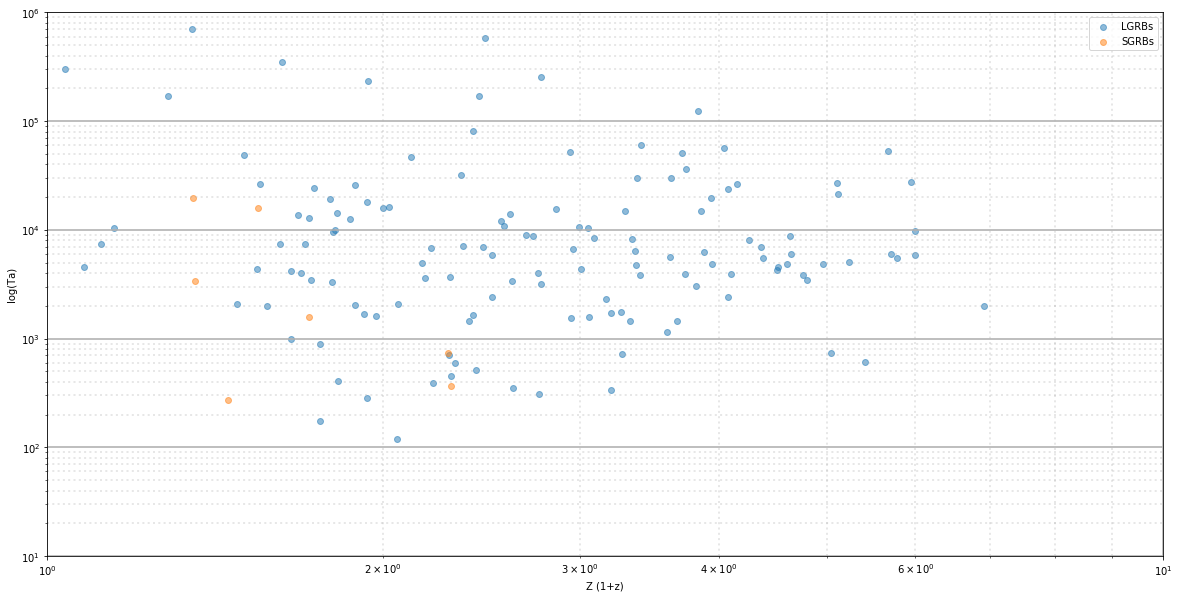

In [60]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.scatter(LGRBs['Z'], LGRBs['Ta'],  alpha=0.5)
plt.scatter(SGRBs['Z'], SGRBs['Ta'], alpha=0.5)

plt.xlim(1, 10)
plt.ylim(10, 10**6)
plt.grid(b=True, which='major', alpha=0.8, linestyle='-', linewidth=2)
plt.grid(b=True, which='minor', alpha=0.3, linestyle='dotted', linewidth=2)

plt.xlabel('Z (1+z)')
plt.ylabel('Ta')
plt.legend(['LGRBs','SGRBs'])
plt.show()

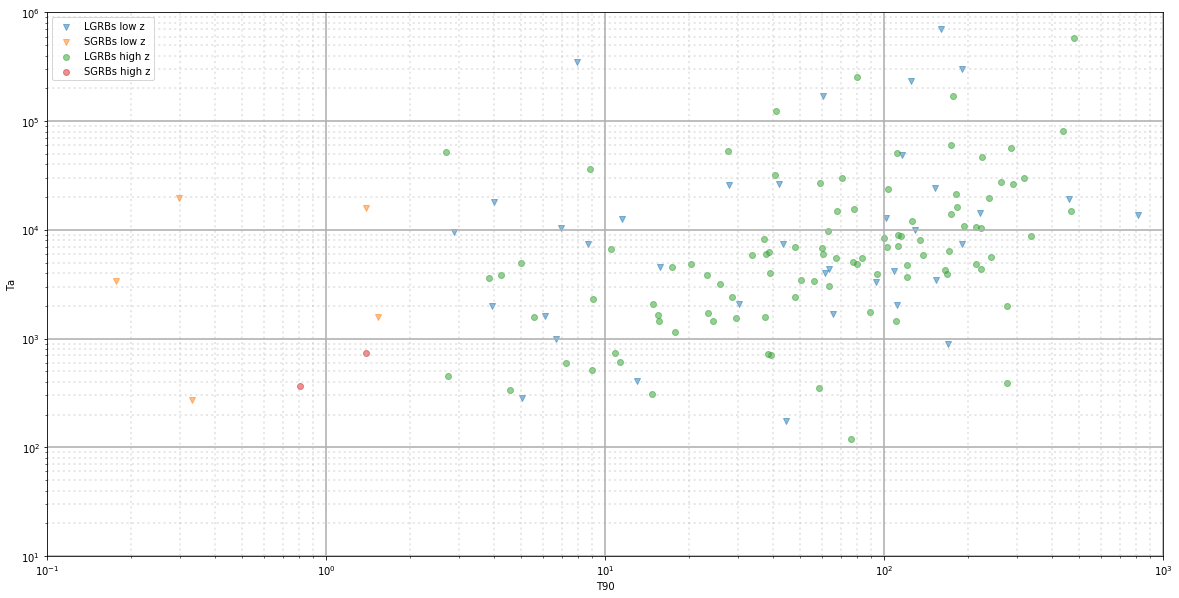

In [68]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.scatter(LGRBs_lowz['T90'], LGRBs_lowz['Ta'], marker= 'v',  alpha=0.5)
plt.scatter(SGRBs_lowz['T90'], SGRBs_lowz['Ta'], marker = 'v', alpha=0.5)
plt.scatter(LGRBs_highz['T90'], LGRBs_highz['Ta'],  alpha=0.5)
plt.scatter(SGRBs_highz['T90'], SGRBs_highz['Ta'],  alpha=0.5)

plt.xlim(0.1, 1000)
plt.ylim(10, 10**6)
plt.grid(b=True, which='major', alpha=0.8, linestyle='-', linewidth=2)
plt.grid(b=True, which='minor', alpha=0.3, linestyle='dotted', linewidth=2)

plt.xlabel('T90')
plt.ylabel('Ta')
plt.legend(['LGRBs low z','SGRBs low z', 'LGRBs high z', 'SGRBs high z'])
plt.show()

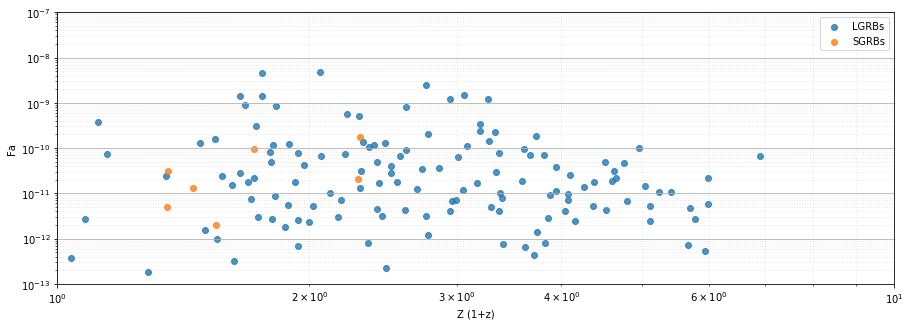

In [65]:
plt.figure(figsize=(15,5)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.scatter(LGRBs['Z'], LGRBs['Fa'],  alpha=0.8)
plt.scatter(SGRBs['Z'], SGRBs['Fa'],  alpha=0.8)
plt.grid(b=True, which='major', alpha=0.8, linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', alpha=0.3, linestyle='dotted', linewidth=1)
plt.xlim(1, 10)
plt.ylim(10**-13, 10**-7)
plt.xlabel('Z (1+z)')
plt.ylabel('Fa')
plt.legend(['LGRBs','SGRBs'])
plt.show()

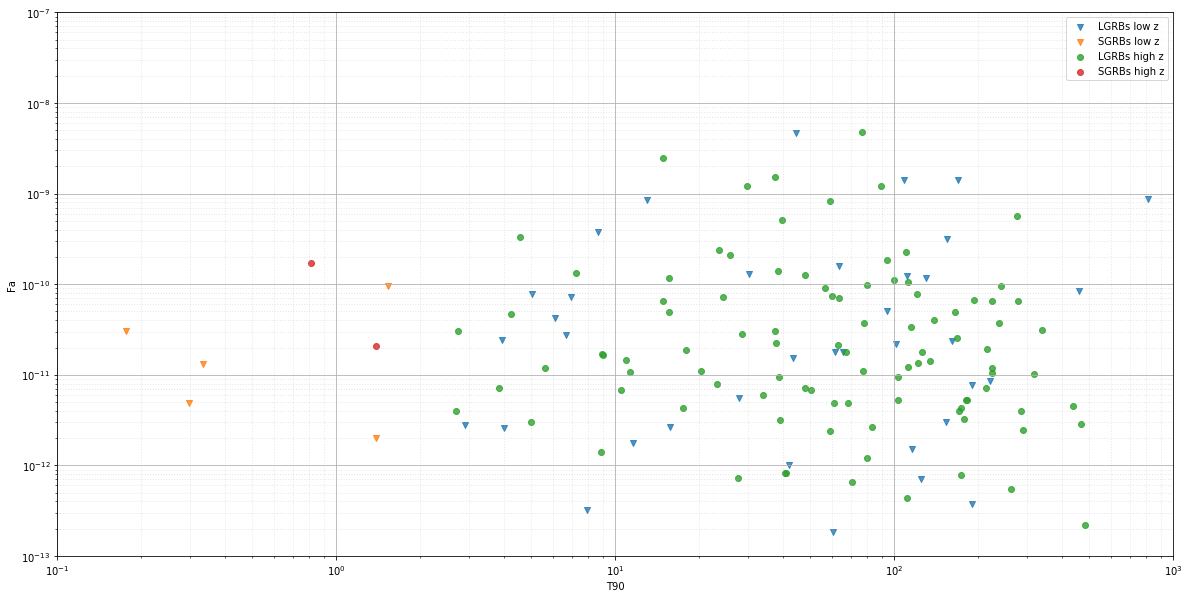

In [67]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.scatter(LGRBs_lowz['T90'], LGRBs_lowz['Fa'], marker='v',  alpha=0.8)
plt.scatter(SGRBs_lowz['T90'], SGRBs_lowz['Fa'], marker = 'v',  alpha=0.8)
plt.scatter(LGRBs_highz['T90'], LGRBs_highz['Fa'],  alpha=0.8)
plt.scatter(SGRBs_highz['T90'], SGRBs_highz['Fa'],  alpha=0.8)
plt.grid(b=True, which='major', alpha=0.8, linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', alpha=0.3, linestyle='dotted', linewidth=1)
plt.xlim(0.1, 10**3)
plt.ylim(10**-13, 10**-7)
plt.xlabel('T90')
plt.ylabel('Fa')
plt.legend(['LGRBs low z','SGRBs low z', 'LGRBs high z', 'SGRBs high z'])
plt.show()

Ks_2sampResult(statistic=0.23552123552123552, pvalue=0.8279282812300695)


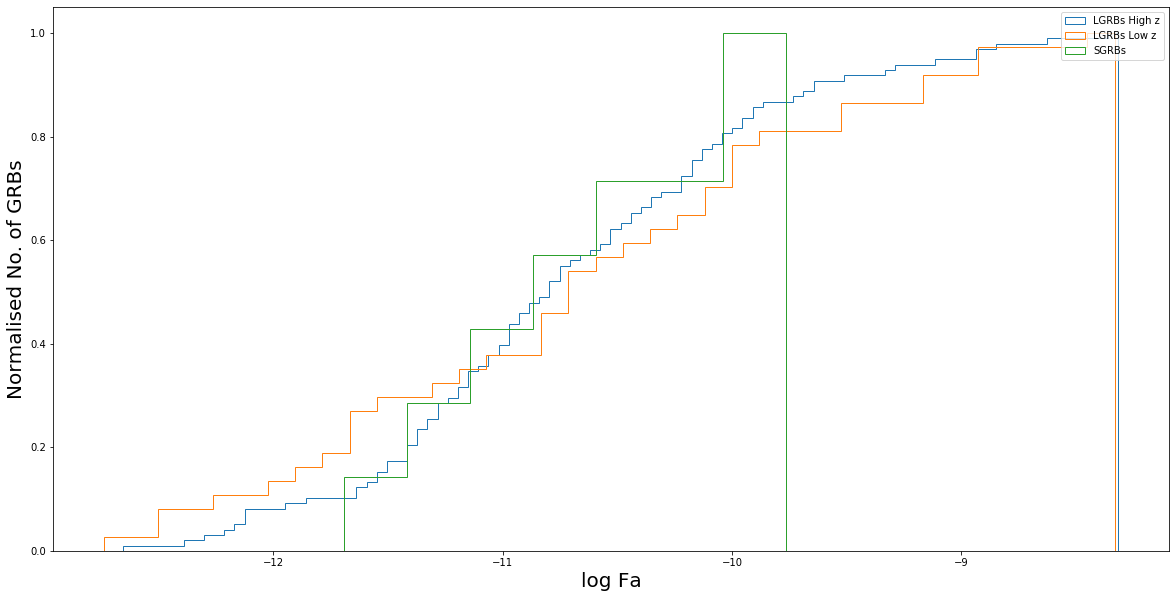

In [117]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
n, bins, patches = plt.hist(LGRBs_highz['log Fa'], histtype='step',cumulative=True, density=True, bins=len(LGRBs_highz))
m, bins, patches = plt.hist(LGRBs_lowz['log Fa'], histtype='step', cumulative=True, density=True, bins=len(LGRBs_lowz))
w, bins, patches = plt.hist(SGRBs['log Fa'], alpha=1, histtype='step', cumulative=True, density=True, bins=len(SGRBs))
print(stats.ks_2samp(w.flatten(), m.flatten()))
plt.xlabel('log Fa', fontsize=20)
plt.ylabel('Normalised No. of GRBs', fontsize=20)
plt.legend(['LGRBs High z', 'LGRBs Low z', "SGRBs"])
plt.show()

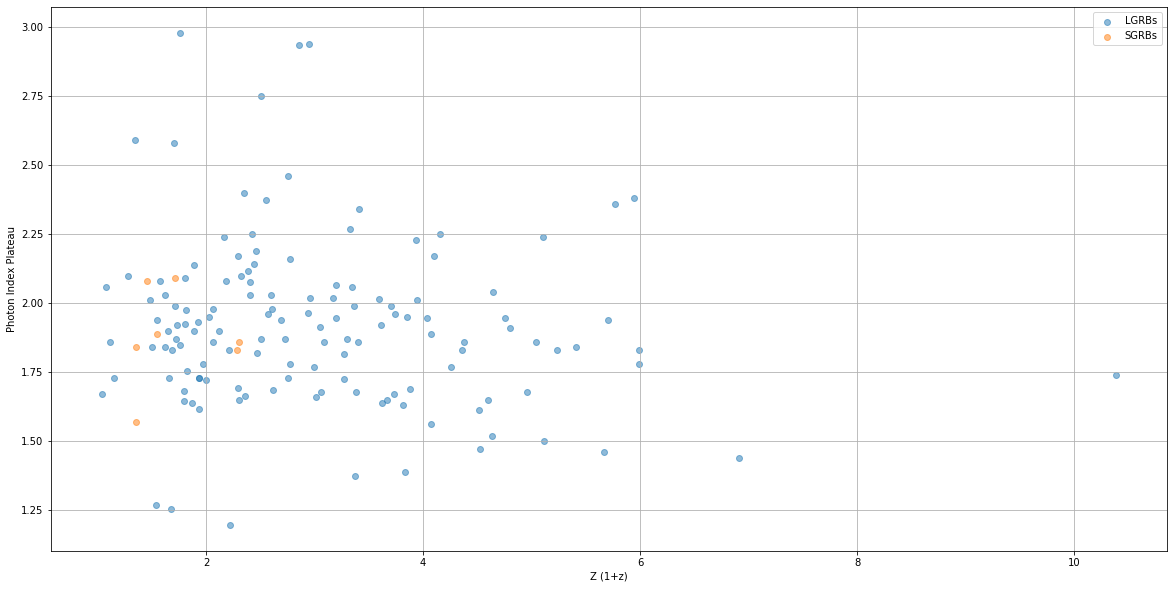

In [70]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
plt.scatter(LGRBs['Z'], LGRBs['Photon Index Plateau'],  alpha=0.5)
plt.scatter(SGRBs['Z'], SGRBs['Photon Index Plateau'],  alpha=0.5)
plt.grid(b=True, which='major', alpha=0.8, linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', alpha=0.3, linestyle='dotted', linewidth=1)
plt.xlabel('Z (1+z)')
plt.ylabel('Photon Index Plateau')
plt.legend(['LGRBs','SGRBs'])
plt.show()

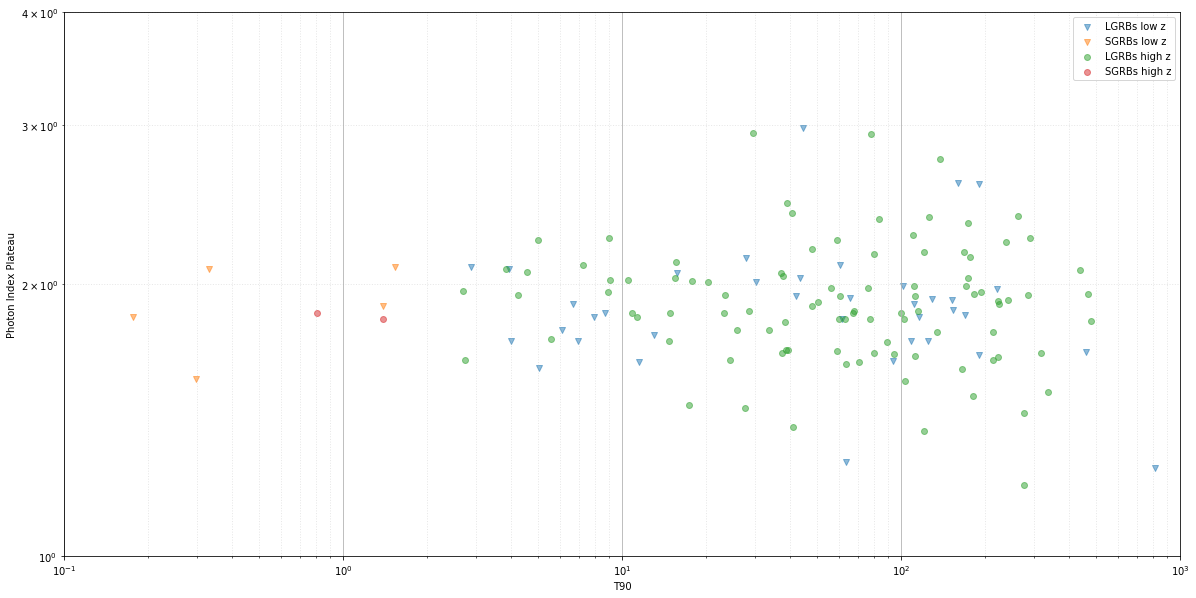

In [79]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.scatter(LGRBs_lowz['T90'], LGRBs_lowz['Photon Index Plateau'], marker='v', alpha=0.5)
plt.scatter(SGRBs_lowz['T90'], SGRBs_lowz['Photon Index Plateau'], marker = 'v',  alpha=0.5)
plt.scatter(LGRBs_highz['T90'], LGRBs_highz['Photon Index Plateau'],  alpha=0.5)
plt.scatter(SGRBs_highz['T90'], SGRBs_highz['Photon Index Plateau'], alpha=0.5)
plt.grid(b=True, which='major', alpha=0.8, linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', alpha=0.3, linestyle='dotted', linewidth=1)
plt.xlim(0.1, 10**3)
plt.ylim(1, 4)
plt.xlabel('T90')
plt.ylabel('Photon Index Plateau')
plt.legend(['LGRBs low z','SGRBs low z', 'LGRBs high z', 'SGRBs high z'])
plt.show()